<a href="https://colab.research.google.com/github/alokrep/finagle-java-test/blob/master/EOLDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import sys
import os
from sklearn.feature_extraction.text import CountVectorizer
from numpy import dot
from numpy.linalg import norm
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

## Read in data and preprocess

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
filepath = '/content/drive/MyDrive/Neal Damireddy'
filepath = '/content/drive/MyDrive/InspiritAI/Students/Neal Damireddy'
filepath = '/content/drive/MyDrive/Kids/Neal/DataScience/eol'
sys.path.append('/content/drive/MyDrive/Kids/Neal/DataScience/eol')
%cd /content/drive/MyDrive/Kids/Neal/DataScience/eol
os.chdir(filepath)
sys.path.append('/content/drive/MyDrive/Kids/Neal/DataScience/eol')
# pylint: disable=wildcard-import
from eol_utils import *


/content/drive/MyDrive/Kids/Neal/DataScience/eol


In [ ]:
!pip install matplotlib-venn

In [ ]:
!pip install matplotlib-venn

In [ ]:
!pip install matplotlib-venn

In [ ]:
!pip install matplotlib-venn

In [ ]:
!pip install matplotlib-venn

In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
from eol_config import eol_path, pickle_path, train_path, train_file, ngram_range

In [ ]:
data = pd.read_csv('eol_train_data_v10.csv')

In [ ]:
data.drop_duplicates(subset='plugin_id', inplace=True)

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
data['title'] = data['title'].replace(np.nan, '')
data['description'] = data['description'].replace(np.nan, '')
data['clean_desc'] = data['title'].values + ' ' + data['description'].values
data['clean_desc'] = data['clean_desc'].apply(pre_process)

/content/drive/MyDrive/Kids/Neal/DataScience/eol/eol_utils.py:24: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = Soup(html_str, features="html.parser")


In [ ]:
data['clean_desc'] = data['clean_desc'].apply(lambda x: re.sub(" eol ", " ", x))
data['clean_desc'] = data['clean_desc'].apply(lambda x: re.sub("^eol ", "", x))
data['clean_desc'] = data['clean_desc'].apply(lambda x: re.sub(" obsolete ", " ", x))
data['clean_desc'] = data['clean_desc'].apply(lambda x: re.sub("^obsolete ", "", x))

In [ ]:
np.unique(data['is_eol'], return_counts = True)

(array([False,  True]), array([685, 836]))

## Random forest over bag of words

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data_train, data_test = train_test_split(data, test_size=0.2, random_state=7)

In [ ]:
results = pd.DataFrame({"gram_size":[], "no_of_features":[], "accuracy":[]})
for i in range(1,6):
  bow_clean_desc = CountVectorizer(ngram_range=(i,i))
  X_train = bow_clean_desc.fit_transform(data_train['clean_desc']).toarray()
  bow_features = bow_clean_desc.get_feature_names_out()
  X_test = bow_clean_desc.transform(data_test['clean_desc']).toarray()
  rf = RandomForestClassifier()
  rf = rf.fit(X_train, data_train['is_eol'].astype(int))
  y_pred = rf.predict(X_test)
  result = [i, len(bow_features), accuracy_score(data_test['is_eol'].astype(int), y_pred)]
  results.loc[len(results)] = result
results.round(2)

,gram_size,no_of_features,accuracy
0,1.0,5145.0,0.99
1,2.0,25979.0,0.98
2,3.0,34230.0,0.93
3,4.0,37719.0,0.89
4,5.0,39464.0,0.87


In [ ]:
bow_clean_desc = CountVectorizer()
X_train = bow_clean_desc.fit_transform(data_train['clean_desc']).toarray()
bow_features = bow_clean_desc.get_feature_names_out()
X_test = bow_clean_desc.transform(data_test['clean_desc']).toarray()
rf = RandomForestClassifier()
rf = rf.fit(X_train, data_train['is_eol'].astype(int))
y_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

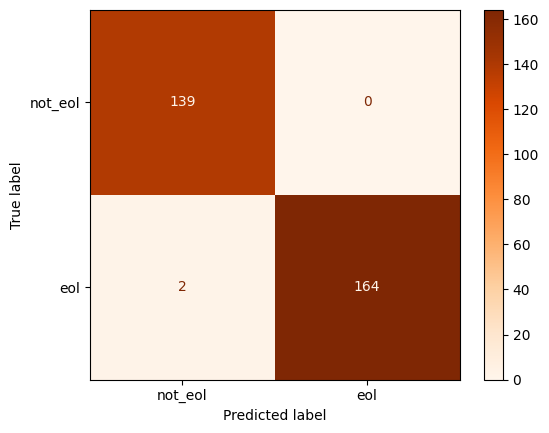

In [ ]:
cm = confusion_matrix(data_test['is_eol'].astype(int), y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["not_eol", "eol"])
disp.plot(cmap='Oranges');

## Old Version

In [ ]:
eol = data[data['is_eol'] == True ]

In [ ]:
not_eol = data[data['is_eol'] == False ]

In [ ]:
eol

,plugin_id,scanner,title,description,plugin_type,is_eol,clean_desc
16,QUALYS105138,QUALYS,EOL/Obsolete Hardware: Juniper NetScreen-5GT D...,juniper ended support for netscreen-5gt on dec...,NaN,True,hardware juniper netscreen gt detect juniper e...
18,QUALYS105337,QUALYS,EOL/Obsolete Software: Microsoft Office 2000 S...,microsoft office 2000 service pack 3 has been ...,NaN,True,software vendor office service pack sp detect ...
19,QUALYS105338,QUALYS,EOL/Obsolete Operating System: Microsoft Windo...,the host is running windows vista with no serv...,NaN,True,operate system vendor windows vista detect hos...
20,QUALYS105339,QUALYS,EOL/Obsolete Operating System: Microsoft Windo...,the host is running windows server 2003 with n...,NaN,True,operate system vendor windows server detect ho...
21,QUALYS105340,QUALYS,EOL/Obsolete Operating System: Microsoft Windo...,the host is running windows server 2003 with s...,NaN,True,operate system vendor windows server service p...
...,...,...,...,...,...,...,...
1519,27587,NESSUS,Debian DSA-1396-1 : iceweasel - several vulner...,Several remote vulnerabilities have been disco...,NaN,True,debian dsa iceweasel several vulnerability sev...
1520,27630,NESSUS,Debian DSA-1401-1 : iceape - several vulnerabi...,Several remote vulnerabilities have been disco...,NaN,True,debian dsa iceape several vulnerability severa...
1521,29259,NESSUS,Debian DSA-1424-1 : iceweasel - several vulner...,Several remote vulnerabilities have been disco...,NaN,True,debian dsa iceweasel several vulnerability sev...
1522,59108,NESSUS,Mobipocket Reader CHM File Handling Remote Ove...,All versions of Mobipocket Reader are potentia...,NaN,True,mobipocket reader chm file handle remote overf...


In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
!python -m spacy download en_core_web_md
import en_core_web_md

text_to_nlp = en_core_web_md.load() # loading in the model

2023-11-27 00:37:26.596418: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-27 00:37:26.596489: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-27 00:37:26.596522: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-27 00:37:27.718795: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 10.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
def tokenize_vecs(text):
    clean_tokens = []
    for token in text_to_nlp(text):
        if (not token.is_stop) & (token.lemma_ != '-PRON-') & (not token.is_punct):
          # -PRON- is a special all inclusive "lemma" spaCy uses for any pronoun, we want to exclude these
            clean_tokens.append(token)
    return np.array(clean_tokens)

In [ ]:
def sum_and_avg_vectors(column):
  '''
    Returns the average of the embedding vectors
  '''
  X_word2vec = []
  for text in column:
    title = tokenize_vecs(text) # returns cleaned list of spacy tokens
    title_vec = [0]*300
    for word in title:
      title_vec += word.vector
    if np.sum(title_vec) > 0:
      title_vec = title_vec / len(title)
    X_word2vec.append(title_vec)

  return np.array(X_word2vec)

In [ ]:
data

,plugin_id,scanner,title,description,plugin_type,is_eol,clean_desc
0,QUALYS100003,QUALYS,Microsoft Internet Explorer Cumulative Securit...,the cumulative security update for microsoft i...,NaN,False,vendor internet explorer cumulative security u...
1,QUALYS100031,QUALYS,Microsoft Internet Explorer window() Code Exec...,a critical vulnerability has been identified i...,NaN,False,vendor internet explorer code execution vulner...
2,QUALYS100046,QUALYS,Microsoft Internet Explorer Cumulative Securit...,multiple vulnerabilities exist in internet exp...,NaN,False,vendor internet explorer cumulative security u...
3,QUALYS100047,QUALYS,Cumulative Security Update for Internet Explor...,multiple vulnerabilities exist in internet exp...,NaN,False,cumulative security update internet explorer m...
4,QUALYS100050,QUALYS,Cumulative Security Update for Internet Explor...,a remote code execution vulnerability exists i...,NaN,False,cumulative security update internet explorer m...
...,...,...,...,...,...,...,...
1521,29259,NESSUS,Debian DSA-1424-1 : iceweasel - several vulner...,Several remote vulnerabilities have been disco...,NaN,True,debian dsa iceweasel several vulnerability sev...
1522,59108,NESSUS,Mobipocket Reader CHM File Handling Remote Ove...,All versions of Mobipocket Reader are potentia...,NaN,True,mobipocket reader chm file handle remote overf...
1523,59661,NESSUS,Fedora 15 : kernel-2.6.43.8-1.fc15 (2012-8931),Update to Linux 2.6.43.8 (3.3.8).\n\nDisabled ...,NaN,True,vendor kernel fc update linux disable bit nx e...
1524,78008,NESSUS,RHEL 4 / 5 / 6 : JBoss EAP (RHSA-2014:1321),Updated packages for Red Hat JBoss Enterprise ...,NaN,False,rhel jboss eap rhsa update package red hat jbo...


In [ ]:
bow_title = CountVectorizer()
titles = bow_title.fit_transform(data['title'].astype(str)).toarray()
eol_titles = np.sum(bow_title.transform(eol['title'].astype(str)).toarray(), axis=0)
not_eol_titles = np.sum(bow_title.transform(not_eol['title'].astype(str)).toarray(), axis=0)
bow_descriptions = CountVectorizer()
descriptions = bow_descriptions.fit_transform(data['description'].astype(str)).toarray()
eol_descriptions = np.sum(bow_descriptions.transform(eol['description'].astype(str)).toarray(), axis=0)
not_eol_descriptions = np.sum(bow_descriptions.transform(not_eol['description'].astype(str)).toarray(), axis=0)

In [ ]:
bow_clean_desc = CountVectorizer(ngram_range=(5,5))
clean_desc = bow_clean_desc.fit_transform(data['clean_desc']).toarray()
eol_clean_desc = np.sum(bow_clean_desc.transform(eol['clean_desc'].astype(str)).toarray(), axis=0)
not_eol_clean_desc = np.sum(bow_clean_desc.transform(not_eol['clean_desc'].astype(str)).toarray(), axis=0)

In [ ]:
bow_features = bow_clean_desc.get_feature_names_out()

In [ ]:
len(bow_features)

46136

In [ ]:
w2v_eol_titles = np.sum(sum_and_avg_vectors(eol['title'].astype(str)), axis = 0)
w2v_not_eol_titles = np.sum(sum_and_avg_vectors(not_eol['title'].astype(str)), axis = 0)
w2v_eol_descriptions = np.sum(sum_and_avg_vectors(eol['description'].astype(str)), axis= 0)
w2v_not_eol_descriptions = np.sum(sum_and_avg_vectors(not_eol['description'].astype(str)), axis = 0)

In [ ]:
w2v_eol = np.sum(sum_and_avg_vectors(eol['clean_desc'].astype(str)), axis = 0)
w2v_not_eol = np.sum(sum_and_avg_vectors(not_eol['clean_desc'].astype(str)), axis = 0)
w2v_all = sum_and_avg_vectors(data['clean_desc'].astype(str))

In [ ]:
def eol_predict(vectors, eol_vec, not_eol_vec):
  predictions = []
  for vector in vectors:
    not_eol_score = dot(vector, not_eol_vec.T)
    eol_score = dot(vector, eol_vec.T)
    if eol_score > not_eol_score:
      predictions.append(1)
    else:
      predictions.append(0)
  return predictions

In [ ]:
predictions = eol_predict(titles, eol_titles, not_eol_titles)
accuracy_score(data['is_eol'].astype(int), predictions)

0.9066403681788298

In [ ]:
results = pd.DataFrame({"gram_size":[], "no_of_features":[], "accuracy":[]})
for i in range(1,6):
  bow_clean_desc = CountVectorizer(ngram_range=(i,i))
  clean_desc = bow_clean_desc.fit_transform(data['clean_desc']).toarray()
  bow_features = bow_clean_desc.get_feature_names_out()
  eol_clean_desc = np.sum(bow_clean_desc.transform(eol['clean_desc'].astype(str)).toarray(), axis=0)
  not_eol_clean_desc = np.sum(bow_clean_desc.transform(not_eol['clean_desc'].astype(str)).toarray(), axis=0)
  predictions = eol_predict(clean_desc, eol_clean_desc, not_eol_clean_desc)
  result = [i, len(bow_features), accuracy_score(data['is_eol'].astype(int), predictions)]
  results.loc[len(results)] = result
results.round(2)

,gram_size,no_of_features,accuracy
0,1.0,5580.0,0.67
1,2.0,29842.0,0.92
2,3.0,39812.0,0.97
3,4.0,44001.0,0.99
4,5.0,46136.0,1.00


In [ ]:
predictions = eol_predict(w2v_all, w2v_eol, w2v_not_eol)
accuracy_score(data['is_eol'].astype(int), predictions)

0.5496383957922419

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

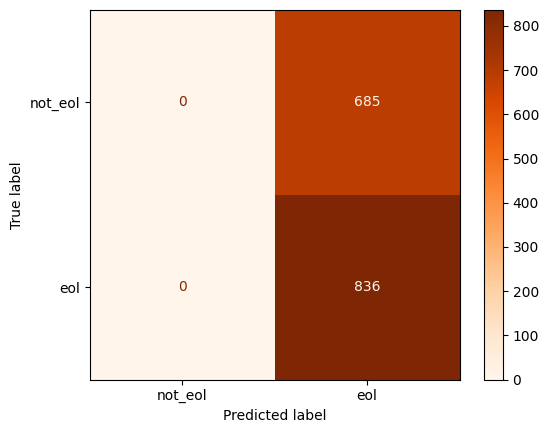

In [ ]:
cm = confusion_matrix(data['is_eol'].astype(int), predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["not_eol", "eol"])
disp.plot(cmap='Oranges');

In [ ]:
data['predictions'] = predictions

In [ ]:
data

,plugin_id,scanner,title,description,plugin_type,is_eol,clean_desc,predictions
0,QUALYS100003,QUALYS,Microsoft Internet Explorer Cumulative Securit...,the cumulative security update for microsoft i...,NaN,False,vendor internet explorer cumulative security u...,1
1,QUALYS100031,QUALYS,Microsoft Internet Explorer window() Code Exec...,a critical vulnerability has been identified i...,NaN,False,vendor internet explorer code execution vulner...,1
2,QUALYS100046,QUALYS,Microsoft Internet Explorer Cumulative Securit...,multiple vulnerabilities exist in internet exp...,NaN,False,vendor internet explorer cumulative security u...,1
3,QUALYS100047,QUALYS,Cumulative Security Update for Internet Explor...,multiple vulnerabilities exist in internet exp...,NaN,False,cumulative security update internet explorer m...,1
4,QUALYS100050,QUALYS,Cumulative Security Update for Internet Explor...,a remote code execution vulnerability exists i...,NaN,False,cumulative security update internet explorer m...,1
...,...,...,...,...,...,...,...,...
1521,29259,NESSUS,Debian DSA-1424-1 : iceweasel - several vulner...,Several remote vulnerabilities have been disco...,NaN,True,debian dsa iceweasel several vulnerability sev...,1
1522,59108,NESSUS,Mobipocket Reader CHM File Handling Remote Ove...,All versions of Mobipocket Reader are potentia...,NaN,True,mobipocket reader chm file handle remote overf...,1
1523,59661,NESSUS,Fedora 15 : kernel-2.6.43.8-1.fc15 (2012-8931),Update to Linux 2.6.43.8 (3.3.8).\n\nDisabled ...,NaN,True,vendor kernel fc update linux disable bit nx e...,1
1524,78008,NESSUS,RHEL 4 / 5 / 6 : JBoss EAP (RHSA-2014:1321),Updated packages for Red Hat JBoss Enterprise ...,NaN,False,rhel jboss eap rhsa update package red hat jbo...,1


In [ ]:
data[np.logical_and(data['is_eol'] == True, data['predictions'] == 0)]

,plugin_id,scanner,title,description,plugin_type,is_eol,clean_desc,predictions


In [ ]:
data[np.logical_and(data['is_eol'] == False, data['predictions'] == 1)]

,plugin_id,scanner,title,description,plugin_type,is_eol,clean_desc,predictions
0,QUALYS100003,QUALYS,Microsoft Internet Explorer Cumulative Securit...,the cumulative security update for microsoft i...,NaN,False,vendor internet explorer cumulative security u...,1
1,QUALYS100031,QUALYS,Microsoft Internet Explorer window() Code Exec...,a critical vulnerability has been identified i...,NaN,False,vendor internet explorer code execution vulner...,1
2,QUALYS100046,QUALYS,Microsoft Internet Explorer Cumulative Securit...,multiple vulnerabilities exist in internet exp...,NaN,False,vendor internet explorer cumulative security u...,1
3,QUALYS100047,QUALYS,Cumulative Security Update for Internet Explor...,multiple vulnerabilities exist in internet exp...,NaN,False,cumulative security update internet explorer m...,1
4,QUALYS100050,QUALYS,Cumulative Security Update for Internet Explor...,a remote code execution vulnerability exists i...,NaN,False,cumulative security update internet explorer m...,1
...,...,...,...,...,...,...,...,...
1454,SERVICEPACK-RIGHTS-MGMT-SERVICES-CLIENT-SP2-IT...,NEXPOSE,Windows Rights Management Services Client with...,\n \n<p>Rights Management Services (RMS) cl...,NaN,False,window right management service client service...,1
1455,9B329198F37D3100957D95C62B0391F2585D6A30398EA0...,NESSUS,MBSS-OS-RHEL7-057a - 2.2.1.1 (L1) Ensure time ...,"""MBSS-OS-RHEL7-057a - 2.2.1.1 (L1) Ensure time...",NaN,False,mb o rhel l ensure time synchronization use ma...,1
1456,A46995E4E058C68B706D9AA9A53C990148ACE6B5319A5F...,NESSUS,NTP is not installed,"""NTP is not installed"" : </br></br>The followi...",NaN,False,ntp not instal ntp not instal follow clause no...,1
1524,78008,NESSUS,RHEL 4 / 5 / 6 : JBoss EAP (RHSA-2014:1321),Updated packages for Red Hat JBoss Enterprise ...,NaN,False,rhel jboss eap rhsa update package red hat jbo...,1


In [ ]:
obsolete = data[data['title'].str.contains("Obsolete")]
string_eol = data[data['title'].str.contains("EOL")]

In [ ]:
string_eol

,plugin_id,scanner,title,description,plugin_type,is_eol,clean_desc,predictions
16,QUALYS105138,QUALYS,EOL/Obsolete Hardware: Juniper NetScreen-5GT D...,juniper ended support for netscreen-5gt on dec...,NaN,True,hardware juniper netscreen gt detect juniper e...,1
18,QUALYS105337,QUALYS,EOL/Obsolete Software: Microsoft Office 2000 S...,microsoft office 2000 service pack 3 has been ...,NaN,True,software vendor office service pack sp detect ...,1
19,QUALYS105338,QUALYS,EOL/Obsolete Operating System: Microsoft Windo...,the host is running windows vista with no serv...,NaN,True,operate system vendor windows vista detect hos...,1
20,QUALYS105339,QUALYS,EOL/Obsolete Operating System: Microsoft Windo...,the host is running windows server 2003 with n...,NaN,True,operate system vendor windows server detect ho...,1
21,QUALYS105340,QUALYS,EOL/Obsolete Operating System: Microsoft Windo...,the host is running windows server 2003 with s...,NaN,True,operate system vendor windows server service p...,1
...,...,...,...,...,...,...,...,...
1322,QUALYS150450,QUALYS,EOL/Obsolete Software: AngularJS 1.x Detected,Web application is using End of Life AngularJS...,NaN,True,software angularjs x detect web application us...,1
1457,21272,NESSUS,Slackware 10.0 / 10.1 / 10.2 / current : mozil...,New Mozilla packages are available for Slackwa...,NaN,True,slackware current vendor security ssa new vend...,1
1472,6a66f823-798d-4553-a196-f1bf231628dd-105632,6a66f823-798d-4553-a196-f1bf231628dd,EOL/Obsolete Operating System: Microsoft Windo...,,NaN,True,operate system vendor windows server detect,1
1473,6a66f823-798d-4553-a196-f1bf231628dd-105859,6a66f823-798d-4553-a196-f1bf231628dd,EOL/Obsolete Operating System: Microsoft Windo...,,NaN,True,operate system vendor windows server r detect,1


In [ ]:
obsolete

,plugin_id,scanner,title,description,plugin_type,is_eol,clean_desc,predictions
16,QUALYS105138,QUALYS,EOL/Obsolete Hardware: Juniper NetScreen-5GT D...,juniper ended support for netscreen-5gt on dec...,NaN,True,hardware juniper netscreen gt detect juniper e...,1
18,QUALYS105337,QUALYS,EOL/Obsolete Software: Microsoft Office 2000 S...,microsoft office 2000 service pack 3 has been ...,NaN,True,software vendor office service pack sp detect ...,1
19,QUALYS105338,QUALYS,EOL/Obsolete Operating System: Microsoft Windo...,the host is running windows vista with no serv...,NaN,True,operate system vendor windows vista detect hos...,1
20,QUALYS105339,QUALYS,EOL/Obsolete Operating System: Microsoft Windo...,the host is running windows server 2003 with n...,NaN,True,operate system vendor windows server detect ho...,1
21,QUALYS105340,QUALYS,EOL/Obsolete Operating System: Microsoft Windo...,the host is running windows server 2003 with s...,NaN,True,operate system vendor windows server service p...,1
...,...,...,...,...,...,...,...,...
1473,6a66f823-798d-4553-a196-f1bf231628dd-105859,6a66f823-798d-4553-a196-f1bf231628dd,EOL/Obsolete Operating System: Microsoft Windo...,,NaN,True,operate system vendor windows server r detect,1
1474,6a66f823-798d-4553-a196-f1bf231628dd-105793,6a66f823-798d-4553-a196-f1bf231628dd,EOL/Obsolete Operating System: Microsoft Windo...,,NaN,True,operate system vendor window detect,1
1476,c081eeb9-10f2-4867-bea9-90f5bee5266a-apache-to...,c081eeb9-10f2-4867-bea9-90f5bee5266a,Apache Tomcat: Obsolete version,Your version of Tomcat is no longer maintained...,NaN,True,vendor tomcat version version of tomcat no lon...,1
1481,FTP-PROFTPD-OBSOLETE,NEXPOSE,Obsolete ProFTPD installation,\n \n<p>ProFTPD versions prior to 1.3.5 are...,NaN,True,proftpd installation n n proftpd version prior...,1


In [ ]:
np.mean(obsolete['is_eol'])

1.0

In [ ]:
np.mean(string_eol['is_eol'])

1.0